# 加载MNIST数据

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
mnist=keras.datasets.mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
print("训练集x的形状为：",x_train.shape,"训练集y的形状为：",y_train.shape)
print("测试集x的形状为：",x_test.shape,"测试集y的形状为：",y_test.shape)

训练集x的形状为： (60000, 28, 28) 训练集y的形状为： (60000,)
测试集x的形状为： (10000, 28, 28) 测试集y的形状为： (10000,)


# 查看训练集y前9个值

In [17]:
y_train[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

# 查看训练集x前9个值

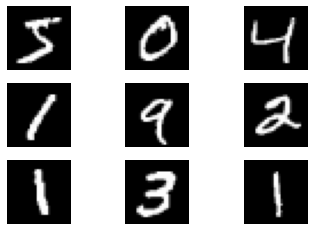

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
for i in range(9):
    im=x_train[i]
    plt.subplot(3,3,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis("off")

# 构建网络模型
网络结构：输入层（28x28）Flatten—>中间层（128）Dense->输出层（10）Dense
loss函数：sparse_categorical_crossentropy
优化算法：adam
评价指标：accuracy

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

(None, 10)


# 训练网络模型
迭代5次（epochs），每次25个（batch_size）

In [37]:
model.fit(x_train, y_train, batch_size=25, epochs=5)

Epoch 1/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1910 - accuracy: 0.9553
Epoch 2/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1918 - accuracy: 0.9558
Epoch 3/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1830 - accuracy: 0.9579
Epoch 4/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1808 - accuracy: 0.9584
Epoch 5/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1903 - accuracy: 0.9566


# 评估训练结果

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.9497


[0.35785454511642456, 0.9496999979019165]

# 对测试集0-9号图片上的数字进行识别

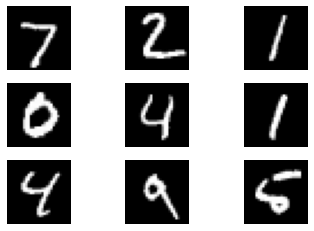

In [39]:
for i in range(9):
    im=x_test[i]
    plt.subplot(3,3,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis("off")

In [40]:
y_test[0:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [41]:
model.predict(x_test[:9])

array([[0.00000000e+00, 4.72747384e-14, 3.35099309e-12, 6.81569533e-14,
        6.24501521e-22, 3.11605386e-35, 0.00000000e+00, 1.00000000e+00,
        9.68775864e-29, 2.75685184e-19],
       [5.69129726e-37, 6.80461162e-05, 9.99931931e-01, 4.64014244e-11,
        0.00000000e+00, 8.39417409e-29, 2.46502109e-28, 1.93569230e-24,
        2.33638570e-18, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 6.25608121e-10, 6.89618501e-13,
        1.04927911e-15, 7.91288055e-17, 3.15659027e-11, 2.61379113e-12,
        2.82367255e-11, 1.14588619e-20],
       [9.99999166e-01, 0.00000000e+00, 7.85950078e-07, 2.36098557e-10,
        1.44518194e-16, 2.47810062e-12, 6.83521165e-12, 5.33941638e-08,
        3.06457832e-12, 4.77339002e-10],
       [4.94674080e-21, 0.00000000e+00, 6.84612064e-17, 9.11338061e-22,
        1.00000000e+00, 1.41769968e-18, 4.40383950e-27, 8.83741106e-21,
        7.76607203e-19, 5.51629800e-14],
       [0.00000000e+00, 1.00000000e+00, 1.37341369e-14, 1.50749326e-11,
   

In [42]:
np.argmax(model.predict(x_test[:9]),axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6])

# 用卷积神经网络改进

In [75]:
model = tf.keras.models.Sequential()  #创建一个Sequential模型
# 第一层卷积：6个卷积核, 大小:5*5, 激活函数:relu
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28,1)))

# 第二层池化：最大池化
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# 第三层卷积：16个卷积核, 大小: 5*5, 激活函数:relu
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))

# 第四层池化：最大池化
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# 进行扁平化
model.add(tf.keras.layers.Flatten())
# 全连接层一：输出节点为120个
model.add(tf.keras.layers.Dense(120, activation='relu'))
# 全连接层二：输出节点为84个
model.add(tf.keras.layers.Dense(84, activation='relu'))
# 输出层：用softmax激活函数计算分类的概率
model.add(tf.keras.layers.Dense(10, activation='softmax')) 

# 优化算法Adam，loss函数
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.metrics.sparse_categorical_crossentropy, metrics=['accuracy'])

In [76]:
model.fit(x_train.reshape((x_train.shape[0],28,28,1)), y_train, batch_size=25, epochs=5)

Epoch 1/5
2400/2400 [==============================] - 28s 11ms/step - loss: 0.8389 - accuracy: 0.8500
Epoch 2/5
2400/2400 [==============================] - 26s 11ms/step - loss: 0.0878 - accuracy: 0.9716
Epoch 3/5
2400/2400 [==============================] - 28s 12ms/step - loss: 0.0651 - accuracy: 0.9793
Epoch 4/5
2400/2400 [==============================] - 28s 12ms/step - loss: 0.0504 - accuracy: 0.9840
Epoch 5/5
2400/2400 [==============================] - 25s 10ms/step - loss: 0.0417 - accuracy: 0.9871


In [78]:
model.evaluate(x_test.reshape((x_test.shape[0],28,28,1)), y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0587 - accuracy: 0.9822


[0.05866898223757744, 0.982200026512146]

In [81]:
np.argmax(model.predict(x_test[:9].reshape((9,28,28,1))),axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

# 使用Pytorch实现MNIST识别

In [5]:
import torch
import torchvision
from torch.autograd import Variable
import torch.utils.data.dataloader as Data

train_data = torchvision.datasets.MNIST(
    './mnist', train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_data = torchvision.datasets.MNIST(
    './mnist', train=False, transform=torchvision.transforms.ToTensor()
)
print("train_data:", train_data.train_data.size())
print("train_labels:", train_data.train_labels.size())
print("test_data:", test_data.test_data.size())

train_loader = Data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = Data.DataLoader(dataset=test_data, batch_size=64)


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, 3, 1, 1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, 3, 1, 1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2)
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 64, 3, 1, 1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2)
        )
        self.dense = torch.nn.Sequential(
            torch.nn.Linear(64 * 3 * 3, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 10)
        )

    def forward(self, x):
        conv1_out = self.conv1(x)
        conv2_out = self.conv2(conv1_out)
        conv3_out = self.conv3(conv2_out)
        res = conv3_out.view(conv3_out.size(0), -1)
        out = self.dense(res)
        return out


model = Net()
print(model)

optimizer = torch.optim.Adam(model.parameters())
loss_func = torch.nn.CrossEntropyLoss()

for epoch in range(10):
    print('epoch {}'.format(epoch + 1))
    # training-----------------------------
    train_loss = 0.
    train_acc = 0.
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = Variable(batch_x), Variable(batch_y)
        out = model(batch_x)
        loss = loss_func(out, batch_y)
        train_loss += loss.data
        pred = torch.max(out, 1)[1]
        train_correct = (pred == batch_y).sum()
        train_acc += train_correct.data
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Train Loss: {:.6f}, Acc: {:.6f}'.format(train_loss / (len(
        train_data)), train_acc / (len(train_data))))

    # evaluation--------------------------------
    model.eval()
    eval_loss = 0.
    eval_acc = 0.
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = Variable(batch_x, volatile=True), Variable(batch_y, volatile=True)
        out = model(batch_x)
        loss = loss_func(out, batch_y)
        eval_loss += loss.data
        pred = torch.max(out, 1)[1]
        num_correct = (pred == batch_y).sum()
        eval_acc += num_correct.data
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(
        test_data)), eval_acc / (len(test_data))))

train_data: torch.Size([60000, 28, 28])
train_labels: torch.Size([60000])
test_data: torch.Size([10000, 28, 28])
Net(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Linear(in_features=576, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
epoch 1


/usr/local/lib64/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Train Loss: 0.003213, Acc: 0.935133


<ipython-input-5-39951d29a259>:82: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  batch_x, batch_y = Variable(batch_x, volatile=True), Variable(batch_y, volatile=True)


Test Loss: 0.000790, Acc: 0.984600
epoch 2
Train Loss: 0.000841, Acc: 0.983450
Test Loss: 0.000504, Acc: 0.989200
epoch 3
Train Loss: 0.000574, Acc: 0.988717
Test Loss: 0.000514, Acc: 0.989600
epoch 4
Train Loss: 0.000442, Acc: 0.991000
Test Loss: 0.000397, Acc: 0.991300
epoch 5
Train Loss: 0.000356, Acc: 0.992883
Test Loss: 0.000469, Acc: 0.990600
epoch 6
Train Loss: 0.000305, Acc: 0.993733
Test Loss: 0.000427, Acc: 0.991100
epoch 7
Train Loss: 0.000246, Acc: 0.994733
Test Loss: 0.000400, Acc: 0.992600
epoch 8
Train Loss: 0.000206, Acc: 0.995483
Test Loss: 0.000384, Acc: 0.993100
epoch 9
Train Loss: 0.000168, Acc: 0.996433
Test Loss: 0.000428, Acc: 0.991200
epoch 10
Train Loss: 0.000155, Acc: 0.996600
Test Loss: 0.000459, Acc: 0.991200
